# K-means clustering: intuitive explanation

The notebook provides an intuitive description and explanation of the k-means clustering technique. A synthetic dataset will be used to identify clusters manually.


## Acknowledgments

- Inquiries: mauricio.antelis@tec.mx


# Importing libraries

In [76]:
# Import the packages that we will be using
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Importing data

In [77]:
# Create synthetic data
d = {'x1':[2,4,2,6,6],
     'x2': [2,3,4,6,5]}

# 5 observaciones
# 2 variables

#Construct dataframe
dataset = pd.DataFrame(data=d)


# Undertanding and preprocessing the data

1. Get a general 'feel' of the data


In [78]:
dataset.shape

(5, 2)

2. Scatter plot of the data

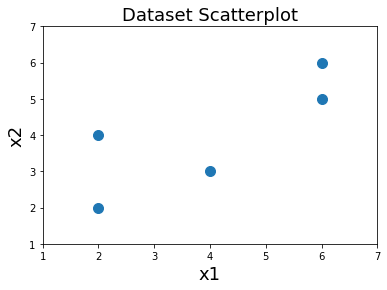

In [79]:
plt.scatter(dataset.x1, dataset.x2, s=100)
plt.title('Dataset Scatterplot', fontsize=18)
plt.xlabel('x1', fontsize=18)
plt.ylabel('x2', fontsize=18)
plt.xlim(1,7)
plt.ylim(1,7)

plt.show()

Note that for this dataset we do not know in advance the cluster/group/class to which each point belongs to, and that is what we want to do: to identify the existing cluster/group/class, i.e., to assing each point to a cluster/group/class

3. Preprocessing the data

No preprocessing is required

# Kmeans clustering

Intuitive explanation

### Initialize/Preliminaries

In [80]:
# Compute the number of points in the dataset
index = dataset.index
nPoints = len(index)
nPoints

5

## 1: Specify the number of clusters

Define the number $K$ of clusters

In [81]:
# Let's assume our data has two clusters (note that the rest of the code is for K=2)
k = 2;

## 2: Initialize the centroids of the clusters

Randomly initialize the centroids of the clusters $C_1, C_2, \cdots, C_K$

In [82]:
# Let's initialize the centroids for the K=2 clusters (this has to be done randomly)

c1 = np.array([1.5, 3.0])
c2 = np.array([3.0, 3.0])

print(c1, c2)

[1.5 3. ] [3. 3.]


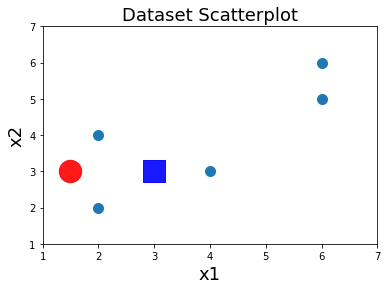

In [83]:
# Plot the points and the centroids
plt.scatter(dataset.x1, dataset.x2, s=100)
plt.scatter(c1[0], c1[1], color='r', marker="o", s=500, alpha=0.9)
plt.scatter(c2[0], c2[1], color='b', marker="s", s=500, alpha=0.9)
plt.title('Dataset Scatterplot', fontsize=18)
plt.xlabel('x1', fontsize=18)
plt.ylabel('x2', fontsize=18)
plt.xlim(1,7)
plt.ylim(1,7)

plt.show()

## 3:  Repeat the following


Define the current centroids

In [101]:
c1 = c1New
c2 = c2New

## 4: Assign each point  to its closest centroid

Compute the distance of each data point to each centroid

Assign each point to the centroid with the minimum Euclidean distance

Euclidean distance:
- Consider two points $x=(x_1,x_2)$ and  $y=(y_1,y_2)$.
- The Euclidean distance between these two points is 
$ d = \sqrt {\left( {x_1 - x_2 } \right)^2 + \left( {y_1 - y_2 } \right)^2 } $


In [102]:
# Compute the distance of each data point to each centroid

dis2Centroids = np.zeros((nPoints, k))

# Manually
ipoint, x1, x2 = 0, 2, 2;
dis2Centroids[ipoint,0] = np.sqrt((x1-c1[0])**2 + (x2-c1[1])**2) 
dis2Centroids[ipoint,1] =np.sqrt((x1-c2[0])**2 + (x2-c2[1])**2) 

ipoint, x1, x2 = 1, 4, 3;
dis2Centroids[ipoint,0] = np.sqrt((x1-c1[0])**2 + (x2-c1[1])**2) 
dis2Centroids[ipoint,1] =np.sqrt((x1-c2[0])**2 + (x2-c2[1])**2) 

ipoint, x1, x2 = 2, 2, 4;
dis2Centroids[ipoint,0] = np.sqrt((x1-c1[0])**2 + (x2-c1[1])**2) 
dis2Centroids[ipoint,1] =np.sqrt((x1-c2[0])**2 + (x2-c2[1])**2) 

ipoint, x1, x2 = 3, 6, 6;
dis2Centroids[ipoint,0] = np.sqrt((x1-c1[0])**2 + (x2-c1[1])**2) 
dis2Centroids[ipoint,1] =np.sqrt((x1-c2[0])**2 + (x2-c2[1])**2) 

ipoint, x1, x2 = 4, 6, 5;
dis2Centroids[ipoint,0] = np.sqrt((x1-c1[0])**2 + (x2-c1[1])**2) 
dis2Centroids[ipoint,1] =np.sqrt((x1-c2[0])**2 + (x2-c2[1])**2) 

dis2Centroids

array([[1.20185043, 5.31507291],
       [1.33333333, 3.20156212],
       [1.20185043, 4.27200187],
       [4.48454135, 0.5       ],
       [3.88730126, 0.5       ]])

In [103]:
# Assign each point to the centroid with the minimum Euclidean distance
#cluster = np.array([1, 2, 1, 2, 2])
cluster = np.array([1, 1, 1, 2, 2])
#cluster = np.array([1, 1, 1, 2, 2])

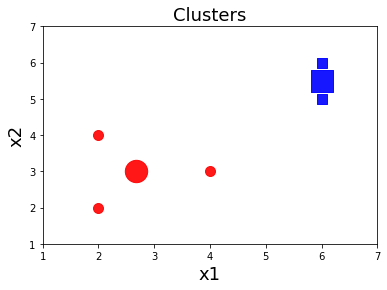

In [104]:
# Scatter plot of the data asigning each point to the cluster it belongs to ¡¡
df1 = dataset[cluster==1]
df2 = dataset[cluster==2]

plt.scatter(df1.x1, df1.x2, color='r', marker="o", s=100, alpha=0.9)
plt.scatter(df2.x1, df2.x2, color='b', marker="s", s=100, alpha=0.9)

plt.scatter(c1[0], c1[1], color='r', marker="o", s=500, alpha=0.1)
plt.scatter(c2[0], c2[1], color='b', marker="s", s=500, alpha=0.1)

plt.scatter(c1New[0], c1New[1], color='r', marker="o", s=500, alpha=0.9)
plt.scatter(c2New[0], c2New[1], color='b', marker="s", s=500, alpha=0.9)

plt.title('Clusters', fontsize=18)
plt.xlabel('x1', fontsize=18)
plt.ylabel('x2', fontsize=18)

plt.xlim(1,7)
plt.ylim(1,7)

plt.show()

## 5: Compute the new centroid (mean) of each cluster

Compute the new centroid of each cluster

In [105]:
# Let's compute the 1st Centroid 
c1New = np.array([0., 0.]);



c1New[0] = df1.x1.mean();
c1New[1] = df1.x2.mean();

c1New

array([2.66666667, 3.        ])

In [106]:
# Let's compute the 2nd Centroid 
c2New = np.array([0., 0.]);
c2New[0] = df2.x1.mean();
c2New[1] = df2.x2.mean();

c2New

array([6. , 5.5])

(1.0, 7.0)

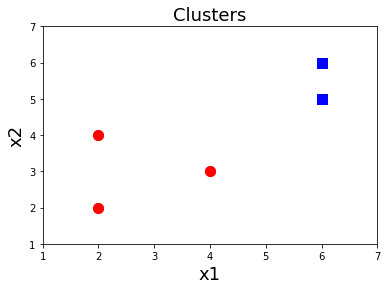

In [107]:
# Scatter plot of the data asigning each point to the cluster it belongs to ¡¡

plt.scatter(df1.x1, df1.x2, color='r', marker="o", s=100, alpha=0.9)
plt.scatter(df2.x1, df2.x2, color='b', marker="s", s=100, alpha=0.9)

plt.scatter(df1.x1, df1.x2, color='r', marker="o", s=100, alpha=0.9)
plt.scatter(df2.x1, df2.x2, color='b', marker="s", s=100, alpha=0.9)

plt.title('Clusters', fontsize=18)
plt.xlabel('x1', fontsize=18)
plt.ylabel('x2', fontsize=18)

plt.xlim(1,7)
plt.ylim(1,7)


## 6: Until the centroids do not change 

If the centroids do not change, then, none of the data points change of the assigned cluster


In [108]:
c1, c1New

(array([2.66666667, 3.        ]), array([2.66666667, 3.        ]))

In [109]:
c2, c2New

(array([6. , 5.5]), array([6. , 5.5]))

#### If the centroids do change... go to 3 (recall to use the new centroids)

#### If the centroids do not change... done ¡¡